<a href="https://colab.research.google.com/github/mhmmdmin/Portfolio/blob/main/Marketing%20Response%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import and Load Libraries

In [104]:
!pip install dalex
!pip install scikit-plot

In [105]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

import dalex as dx

import scikitplot as skplt

%matplotlib inline

#Import and Load Data

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
df = pd.read_csv("/content/drive/MyDrive/data/ifood_df.csv")

1. Age = Customer's age
2. Education = Customer's education level
3. Customer_Days = How many times customer came to company
4. Marital_Divorced = Customer's marital status is divorced
5. Marital_Married = Customer's marital status is married
6. Marital_Single = Customer's marital status is signle
7. Marital_Together = Customer's marital status is together
8. Marital_Widow = Customer's marital status is widow
9. Education_2n Cycle = Customer's education level is 2nd cycle
10. Education_Basic = Customer's education level is basic
11. Education_Graduation = Customer's education level is graduation
12. Education_Master = Customer's education level is master
13. Education_PhD = Customer's education level is PhD
14. Marital_Status = Customer's marital status
15. Income = Customer's yearly household income
16. Kidhome = Number of children in customer's household
17. Teenhome = Number of teenagers in customer's household
18. Dt_Customer = Date of customer's enrollment with the company
19. Recency = Number of days since customer's last purchase
20. MntWines = Amount spent on wine in the last 2 years
21. MntFruits = Amount spent on fruits in the last 2 years
22. MntMeatProducts = Amount spent on meat in the last 2 years
23. MntFishProducts = Amount spent on fish in the last 2 years
24. MntSweetProducts = Amount spent on sweets in the last 2 years
25. MntGoldProds = Amount spent on gold in the last 2 years
26. NumDealsPurchases = Number of purchases made with a discount
27. NumWebPurchases = Number of purchases made through the company's web site
28. NumCatalogPurchases = Number of purchases made using a catalogue
29. NumStorePurchases = Number of purchases made directly in stores
30. NumWebVisitsMonth = Number of visits to company's web site in the last month
31. AcceptedCmp3 = 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
32. AcceptedCmp4 = 1 if customer accepted the offer in the 4th campaign, 0 otherwise
33. AcceptedCmp5 = 1 if customer accepted the offer in the 5th campaign, 0 otherwise
34. AcceptedCmp1 = 1 if customer accepted the offer in the 1st campaign, 0 otherwise
35. AcceptedCmp2 = 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
36. Response = 1 if customer accepted the offer in the last campaign, 0 otherwise
37. Complain = 1 if customer complained in the last 2 years, 0 otherwise

#Data Inspection

In [108]:
#Check Dataset
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [109]:
#Check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

**Check Unique in Each Columns**

In [110]:
for x in df.columns:
  print(f"unique value of {x}")
  print(f"{df[x].unique()}")
  print()

unique value of Income
[58138. 46344. 71613. ... 56981. 69245. 52869.]

unique value of Kidhome
[0 1 2]

unique value of Teenhome
[0 1 2]

unique value of Recency
[58 38 26 94 16 34 32 19 68 59 82 53 23 51 20 91 86 41 42 63  0 69 89  4
 96 56 31  8 55 37 76 99  3 88 72 24 92 39 29  2 54 57 30 12 18 75 90  1
 40  9 87  5 95 48 70 79 84 44 43 35 15 17 46 27 25 74 85 65 13 83 10 21
 61 73 47 36 49 28 64 78 77 81 80 45 14 52 98 93 50 60 11 66 97 62  6 33
 22 71 67  7]

unique value of MntWines
[ 635   11  426  173  520  235   76   14   28    6  194  233    3 1006
   53   84 1012    4   86    1  867  384  270   36  684    8  112  110
   96  482   40  702   55  437  421   13    9  123  826  245  650   12
  510  328  984  295  447  712  452  523  546  398   10  688  247  856
  496  258  565    2  721 1032  577   64   25  163   17  130  292  350
  135   15   27    5  505   51  207   41  386  562  217  144  454  425
 1332  527  490  378  547   47  320   34  722  162  450   70  492  120
  534  2

In [111]:
#Check missing value
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [112]:
#Check duplicate value
df.duplicated().sum()

184

In [113]:
df[df.duplicated(keep = False)]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
14,82800.0,0,0,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1,74,2741,0,0,1,0,0,0,0,0,0,1,1270,1225,2
16,37760.0,0,0,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,3,11,0,74,2826,0,0,0,1,0,0,0,1,0,0,289,261,0
22,65324.0,0,1,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,3,11,0,66,2328,0,1,0,0,0,0,0,0,0,1,539,534,0
23,40689.0,0,1,69,270,3,27,39,6,99,7,7,1,5,8,0,0,0,0,0,0,3,11,0,69,2627,0,0,0,1,0,0,0,1,0,0,345,246,0
27,84618.0,0,0,96,684,100,801,21,66,0,1,6,9,10,2,0,0,1,0,0,0,3,11,0,55,2378,0,1,0,0,0,0,0,0,0,1,1672,1672,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,22775.0,1,0,40,5,1,8,0,0,1,1,1,0,2,8,0,0,0,0,0,0,3,11,0,42,2534,0,0,0,1,0,0,0,1,0,0,14,13,0
2188,75777.0,0,0,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,3,11,1,38,2519,0,0,1,0,0,0,0,0,1,0,1358,1278,2
2192,58554.0,1,1,55,368,24,68,38,0,88,6,8,2,6,7,0,0,0,0,0,0,3,11,0,52,2800,0,0,0,1,0,0,0,1,0,0,498,410,0
2199,34421.0,1,0,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0,46,2522,0,1,0,0,0,0,0,1,0,0,21,12,0


In [114]:
#Drop duplicate value
df.drop_duplicates(keep=False, inplace=True)

#Data Transformation

In [115]:
#Change Column data type to string and then replace 1 with different number & 0 with blank
df['marital_Married']=df['marital_Married'].astype(str).replace({'1':'3','0':''})
df['marital_Single']=df['marital_Single'].astype(str).replace({'0':''})
df['marital_Together']=df['marital_Together'].astype(str).replace({'1':'2','0':''})
df['marital_Widow']=df['marital_Widow'].astype(str).replace({'1':'5','0':''})
df['marital_Divorced']=df['marital_Divorced'].astype(str).replace({'1':'4', '0':''})
#Join them in one column
df['marital_status']=df["marital_Widow"]+df['marital_Together']+df['marital_Single']+df['marital_Married']+df['marital_Divorced']
#Map numbers into different categorical values
df['marital_status']=df['marital_status'].map({'1':'Single', '2':'Together','3':'Married','4':'Divorced','5':'Widow'})

In [116]:
#Change Column data type to string and then replace 1 with different number & 0 with blank.
df['education_2n Cycle']= df['education_2n Cycle'].astype(str).replace({'0':''})
df['education_Basic']= df['education_Basic'].astype(str).replace({'1':'2','0':''})
df['education_Graduation']= df['education_Graduation'].astype(str).replace({'1':'3','0':''})
df['education_Master']= df['education_Master'].astype(str).replace({'1':'4','0':''})
df['education_PhD']= df['education_PhD'].astype(str).replace({'1':'5','0':''})
#Join them in one column
df['education_level']= df['education_2n Cycle']+df['education_Basic']+df['education_Graduation']+df['education_Master']+df['education_PhD']
#Map numbers into different categorical values
df['education_level']= df['education_level'].map({'1':'2n Cycle','2':'Basic','3':'Graduation','4':'Master','5':'PhD'})

**Check the relationship between kidhome and teenhome before join them**

<Axes: xlabel='Kidhome,Teenhome'>

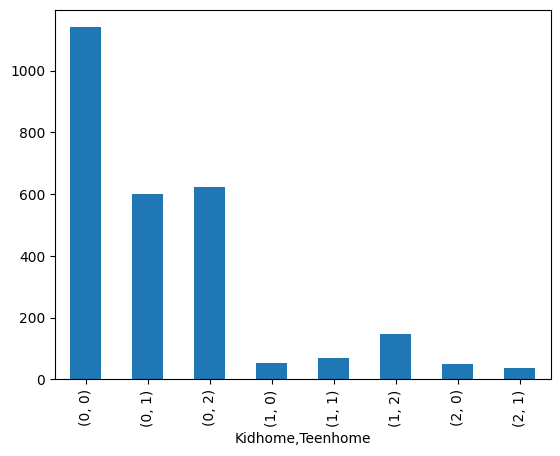

In [117]:
df.groupby(['Kidhome', 'Teenhome'])['MntTotal'].median().plot(kind='bar')

There's no relationship between kidhome and teenhome in total amount of spent, so I will merge them into 1 columns.

In [118]:
df['dependent_counts']=df['Kidhome']+df['Teenhome']

<Axes: xlabel='dependent_counts'>

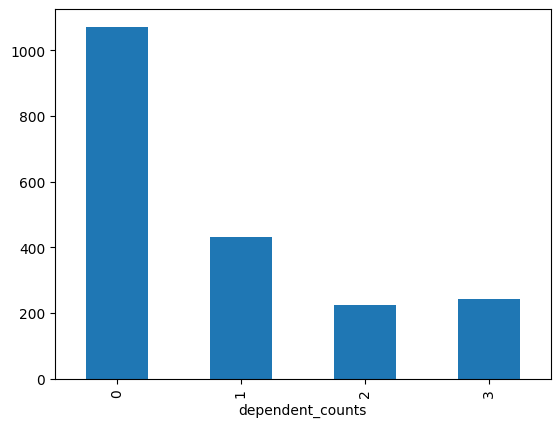

In [119]:
df.groupby('dependent_counts')['MntTotal'].mean().plot(kind='bar')

In [120]:
df = df.drop(['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD','marital_Widow','marital_Together','marital_Single','marital_Married','marital_Divorced','Kidhome','Teenhome'], axis=1)

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,1843.0,51755.752577,20727.936663,1730.0,35683.0,51650.0,68145.0,113734.0
Recency,1843.0,48.734129,28.951696,0.0,24.0,49.0,74.0,99.0
MntWines,1843.0,307.167119,337.913890,0.0,23.5,179.0,508.0,1493.0
MntFruits,1843.0,26.308193,39.733319,0.0,2.0,8.0,33.0,197.0
MntMeatProducts,1843.0,166.813348,222.103689,0.0,16.0,68.0,225.0,1725.0
MntFishProducts,1843.0,37.400977,54.895591,0.0,2.5,12.0,50.0,259.0
MntSweetProducts,1843.0,27.416712,42.066386,0.0,1.0,8.0,34.0,262.0
MntGoldProds,1843.0,43.837222,51.690589,0.0,9.0,24.0,56.0,321.0
NumDealsPurchases,1843.0,2.342377,1.899620,0.0,1.0,2.0,3.0,15.0
NumWebPurchases,1843.0,4.134021,2.774936,0.0,2.0,4.0,6.0,27.0


#Train Test Split

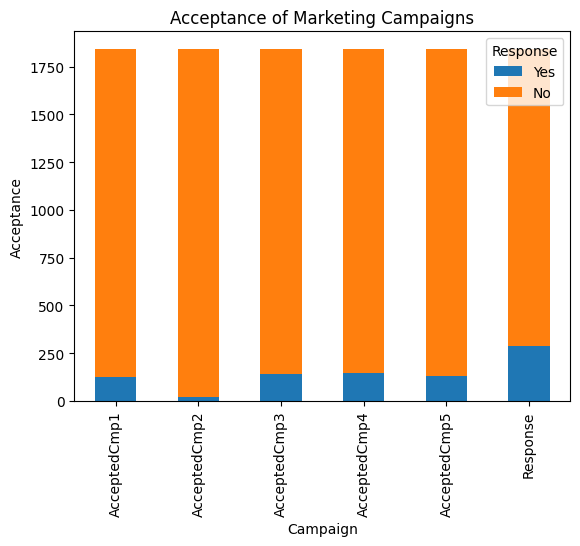

In [122]:
#most successful campaign
campaign = df.loc[:,['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]

campaign = campaign.melt()
campaign = pd.crosstab(campaign["variable"], campaign["value"])

cols = list(campaign.columns)
a, b = cols.index(0), cols.index(1)
cols[b], cols[a] = cols[a], cols[b]
campaign = campaign[cols]

campaign.columns = "Yes","No"
campaign.plot.bar(stacked=True)
plt.title('Acceptance of Marketing Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Acceptance')
plt.legend(title='Response',loc='upper right')
plt.show()

In [123]:
df['AcceptedCmpOverall'].value_counts()

0    1448
1     281
2      69
3      36
4       9
Name: AcceptedCmpOverall, dtype: int64

We only used the last campaign as the target because it has the most significant effect over all campaign.

In [124]:
X = df.drop(["Response"], axis = 1)
y = df["Response"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify = y,
    random_state=1000
)

# EDA

In [126]:
#Define function for proportion
def prop_agg(df, y, x):
  temp_df = df.groupby([y,x], as_index = False).size()
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
  return temp_df

In [127]:
X_train["Response"] = y_train

##Age

In [128]:
X_train["age_bin"] = pd.cut(X_train['Age'],bins=[20,30,40,50,60,70,80],labels=['21-30','31-40','41-50','51-60',"61-70", "71+"])

In [129]:
prop_agg(X_train, "age_bin", "Response")

,age_bin,Response,size,prop
0,21-30,0,31,0.738095
1,21-30,1,11,0.261905
2,31-40,0,193,0.810924
3,31-40,1,45,0.189076
4,41-50,0,425,0.860324
5,41-50,1,69,0.139676
6,51-60,0,282,0.862385
7,51-60,1,45,0.137615
8,61-70,0,263,0.848387
9,61-70,1,47,0.151613


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



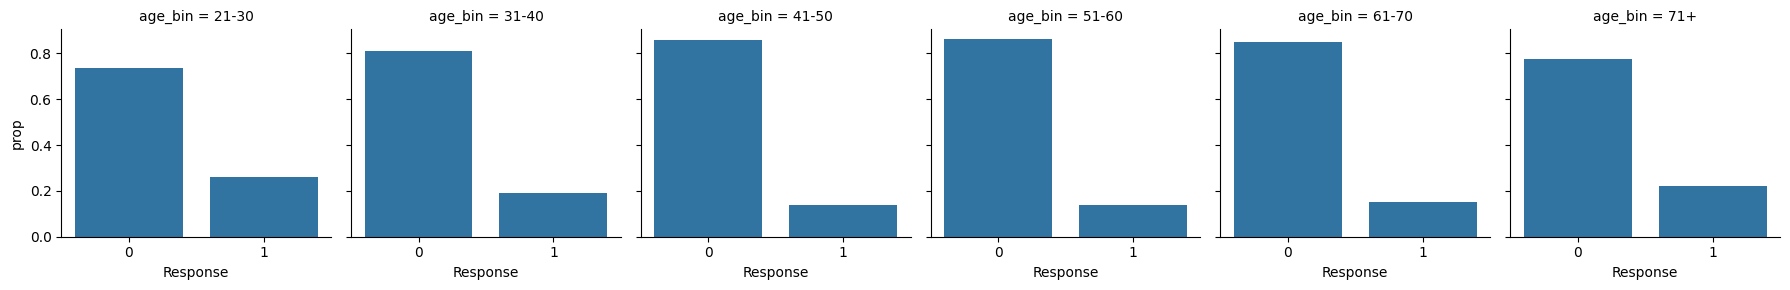

In [130]:
# Visualization last campaign
g = sns.FacetGrid(data = prop_agg(X_train, "age_bin", "Response"),col = "age_bin");
g.map(sns.barplot, "Response", "prop");

The last campaign, age 21-30 and 71+ has the most response percentage. Followed by 31-40 years old, 41-50 years old, 61-70 years old and 51-60 years old.

In [131]:
X_train.groupby("age_bin")["Response"].mean()

age_bin
21-30    0.261905
31-40    0.189076
41-50    0.139676
51-60    0.137615
61-70    0.151613
71+      0.222222
Name: Response, dtype: float64

**Check the income of age**

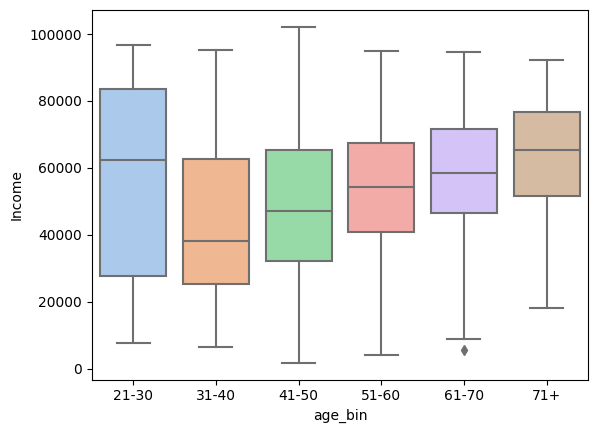

In [132]:
sns.boxplot(x = "age_bin",
            y = "Income",
            data = X_train,
            palette='pastel');

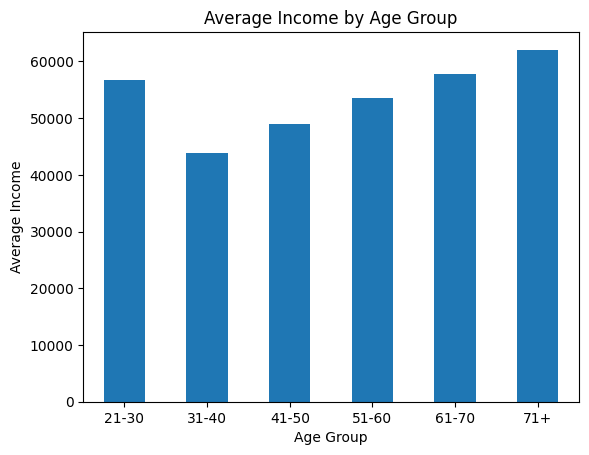

In [133]:
X_train.groupby("age_bin")["Income"].mean().plot(kind="bar").set_title("Average Income by Age Group")
plt.ylabel("Average Income")
plt.xlabel("Age Group")
plt.xticks(rotation=0);

We can see that there's an uptrend of average income by age group after 21-30 which 31-40 has the lowest income of them all.

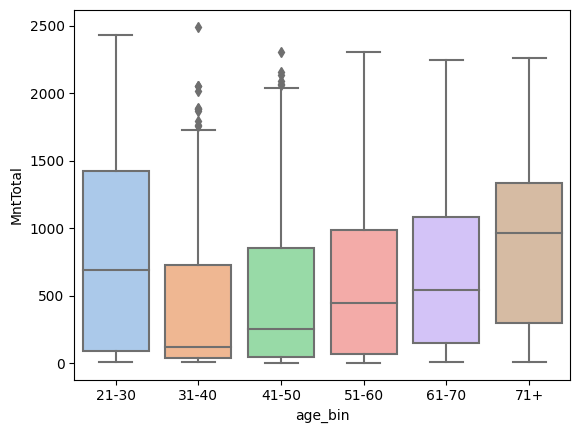

In [134]:
sns.boxplot(x = "age_bin",
            y = "MntTotal",
            data = X_train,
            palette='pastel');

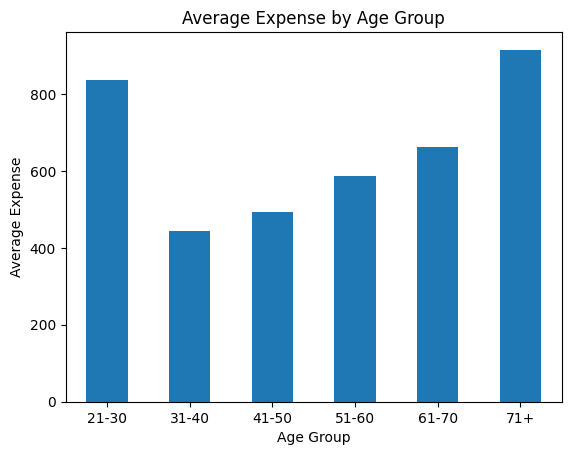

In [135]:
X_train.groupby("age_bin")["MntTotal"].mean().plot(kind="bar").set_title("Average Expense by Age Group")
plt.ylabel("Average Expense")
plt.xlabel("Age Group")
plt.xticks(rotation=0);

Same as the income, the average expense by age group has the same trend after 21-30 years old. Maybe it is influenced by their job but we don't have that in our dataset now.

##Dependent

In [136]:
prop_agg(X_train, "dependent_counts", "Response")

,dependent_counts,Response,size,prop
0,0,0,299,0.727494
1,0,1,112,0.272506
2,1,0,664,0.888889
3,1,1,83,0.111111
4,2,0,252,0.878049
5,2,1,35,0.121951
6,3,0,28,0.965517
7,3,1,1,0.034483


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



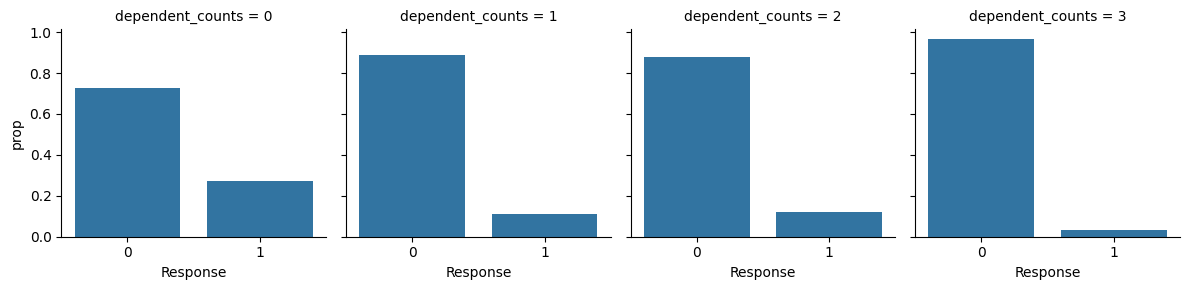

In [137]:
# Visualization
g = sns.FacetGrid(data = prop_agg(X_train, "dependent_counts", "Response"),col = "dependent_counts");
g.map(sns.barplot, "Response", "prop");

As we can see that dependent count 0 has the most significant response to the last campaign.

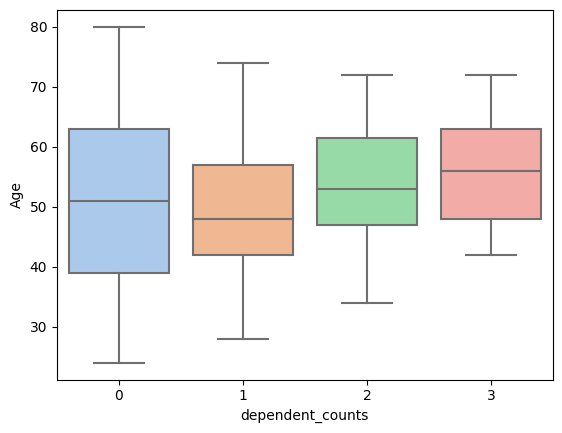

In [138]:
sns.boxplot(x = "dependent_counts",
            y = "Age",
            data = X_train,
            palette='pastel');

age range of each dependent counts is vary and the 0 dependent count has the widest variation.

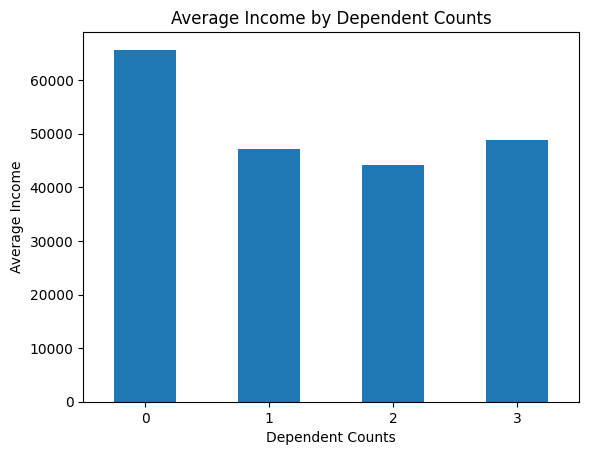

In [139]:
X_train.groupby("dependent_counts")["Income"].mean().plot(kind="bar").set_title("Average Income by Dependent Counts")
plt.ylabel("Average Income")
plt.xlabel("Dependent Counts")
plt.xticks(rotation=0);

We can see the average income that has no dependent counts is the largest of them all.

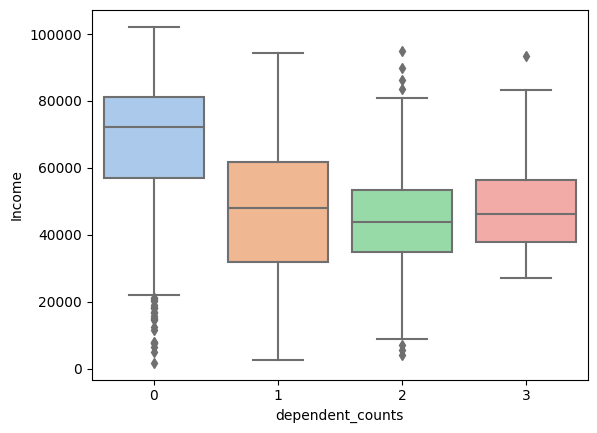

In [140]:
sns.boxplot(x = "dependent_counts",
            y = "Income",
            data = X_train,
            palette='pastel');

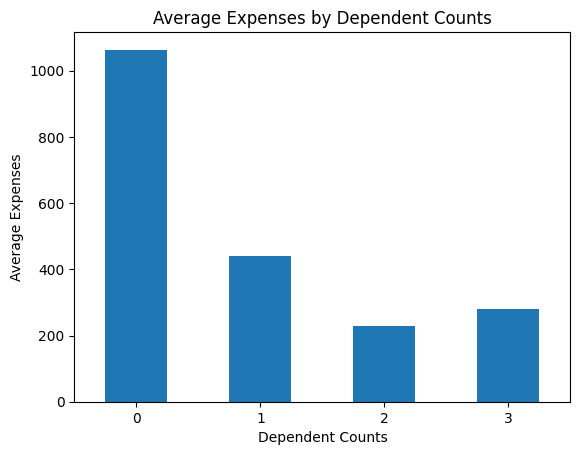

In [141]:
X_train.groupby("dependent_counts")["MntTotal"].mean().plot(kind="bar").set_title("Average Expenses by Dependent Counts")
plt.ylabel("Average Expenses")
plt.xlabel("Dependent Counts")
plt.xticks(rotation=0);

The average expenses of 0 dependent count is also the highest of them all.

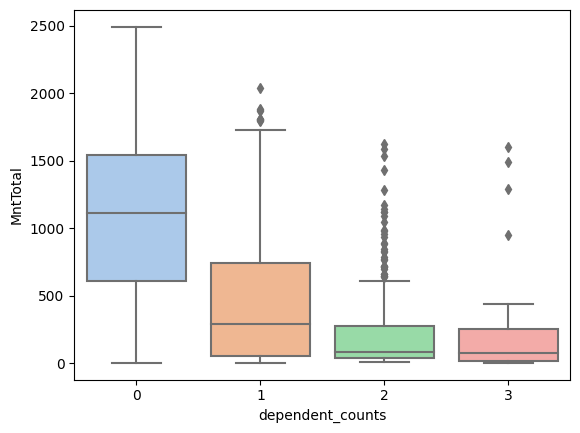

In [142]:
sns.boxplot(x = "dependent_counts",
            y = "MntTotal",
            data = X_train,
            palette='pastel');

##Education

In [143]:
prop_agg(X_train, "education_level", "Response")

,education_level,Response,size,prop
0,2n Cycle,0,120,0.875912
1,2n Cycle,1,17,0.124088
2,Basic,0,32,0.941176
3,Basic,1,2,0.058824
4,Graduation,0,644,0.864430
5,Graduation,1,101,0.135570
6,Master,0,198,0.835443
7,Master,1,39,0.164557
8,PhD,0,249,0.775701
9,PhD,1,72,0.224299


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



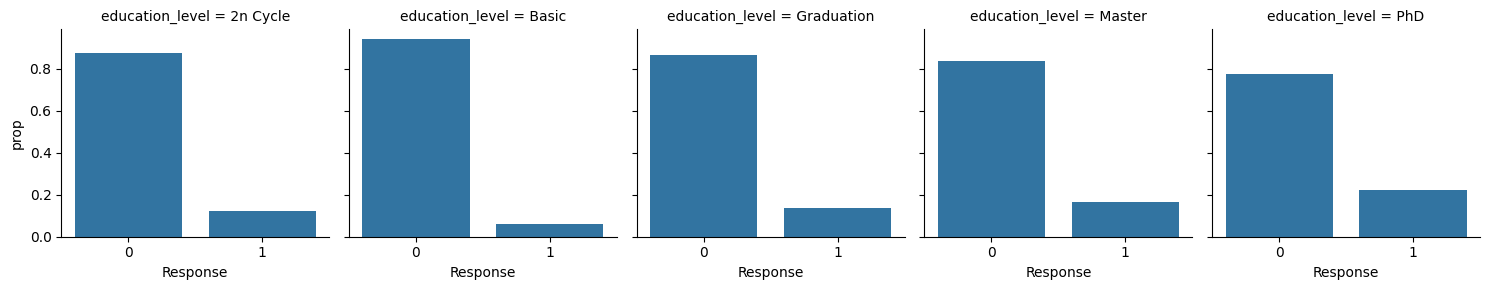

In [144]:
# Visualization last campaign
g = sns.FacetGrid(data = prop_agg(X_train, "education_level", "Response"),col = "education_level");
g.map(sns.barplot, "Response", "prop");

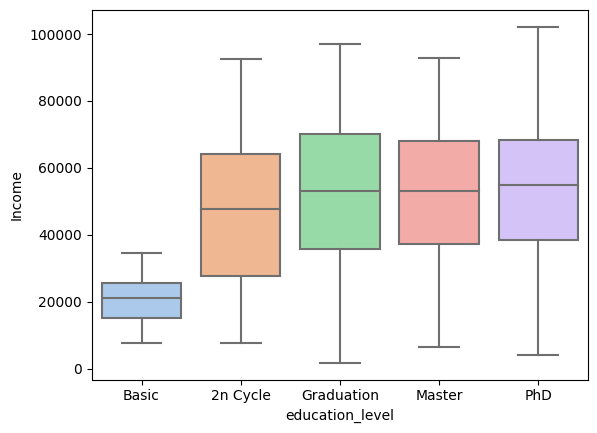

In [145]:
order_el = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
sns.boxplot(x = "education_level",
            y = "Income",
            data = X_train,
            order = order_el,
            palette='pastel');

We can see from the plot that education level of basic has the lowest income than the others.

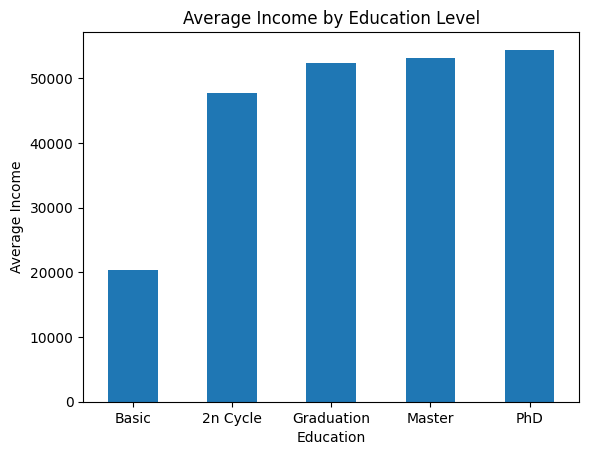

In [146]:
X_train.groupby("education_level")["Income"].mean().loc[order_el].plot(kind="bar").set_title("Average Income by Education Level")
plt.ylabel("Average Income")
plt.xlabel("Education")
plt.xticks(rotation=0);

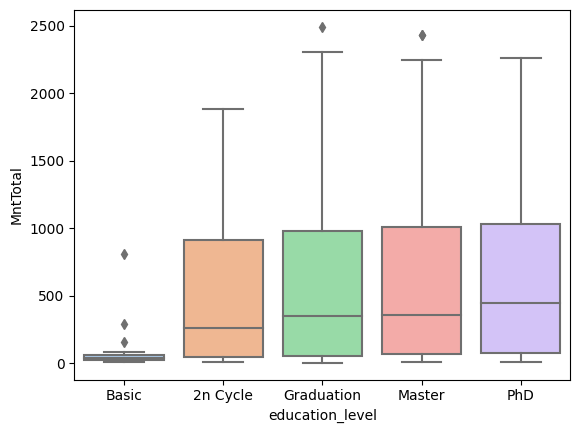

In [147]:
sns.boxplot(x = "education_level",
            y = "MntTotal",
            data = X_train,
            order = order_el,
            palette='pastel');

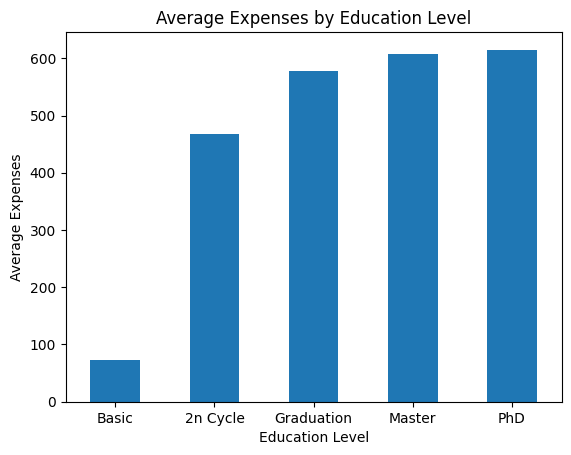

In [148]:
X_train.groupby("education_level")["MntTotal"].mean().loc[order_el].plot(kind="bar").set_title("Average Expenses by Education Level")
plt.ylabel("Average Expenses")
plt.xlabel("Education Level")
plt.xticks(rotation=0);

Because the basic average income is low it effects its expense which is low too.

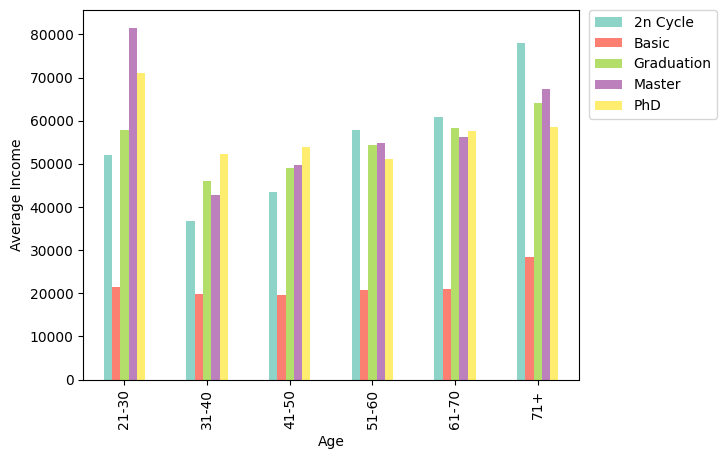

In [149]:
pd.pivot_table(X_train, index='age_bin', columns='education_level', values='Income', aggfunc='mean').plot(kind='bar', colormap='Set3')
plt.ylabel('Average Income')
plt.xlabel('Age')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

As we can see from plot above that, the reason why average income of 21-30 is high because there are few people which has master degree and PhD with high income exceeding the age of 31 even until 70 years old.

##Marital

In [150]:
prop_agg(X_train, "marital_status", "Response")

,marital_status,Response,size,prop
0,Divorced,0,127,0.803797
1,Divorced,1,31,0.196203
2,Married,0,497,0.878092
3,Married,1,69,0.121908
4,Single,0,264,0.771930
5,Single,1,78,0.228070
6,Together,0,317,0.890449
7,Together,1,39,0.109551
8,Widow,0,38,0.730769
9,Widow,1,14,0.269231


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



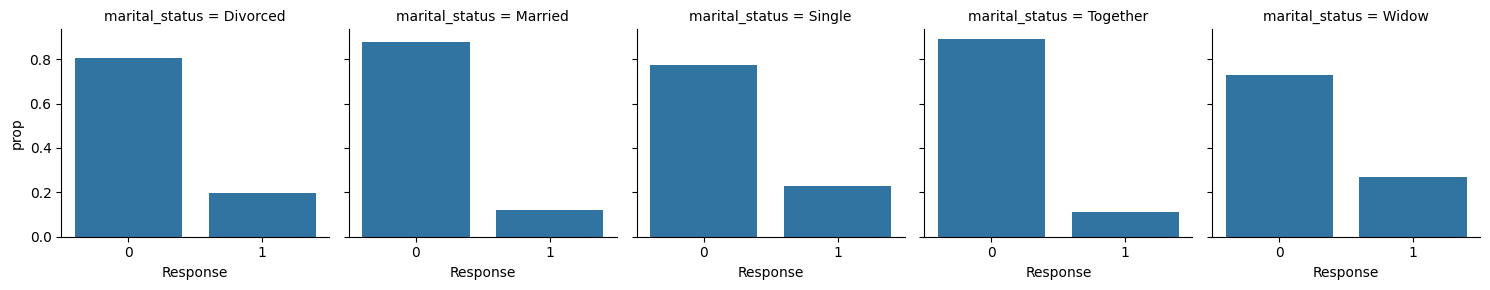

In [151]:
# Visualization last campaign
g = sns.FacetGrid(data = prop_agg(X_train, "marital_status", "Response"),col = "marital_status");
g.map(sns.barplot, "Response", "prop");

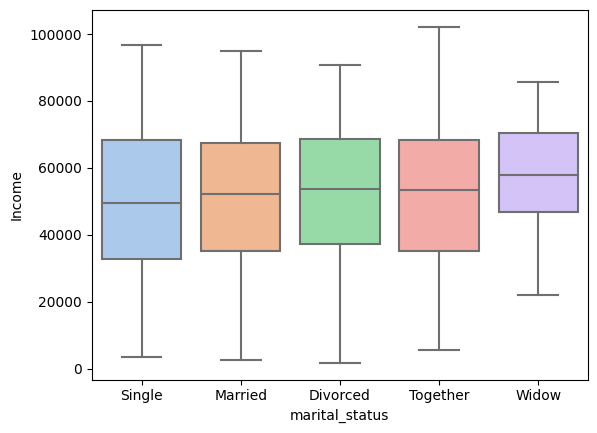

In [152]:
sns.boxplot(x = "marital_status",
            y = "Income",
            data = X_train,
            palette='pastel');

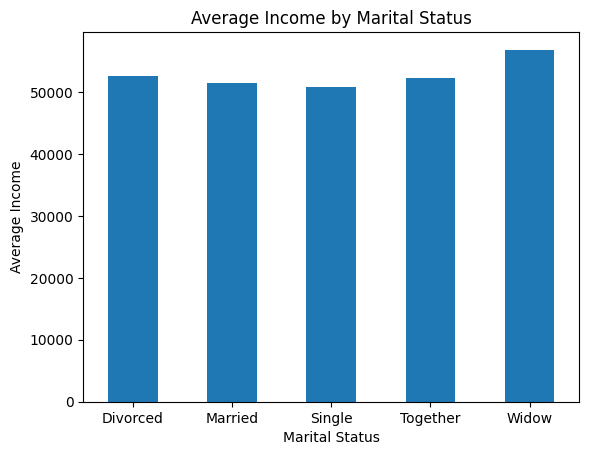

In [153]:
X_train.groupby("marital_status")["Income"].mean().plot(kind="bar").set_title("Average Income by Marital Status")
plt.ylabel("Average Income")
plt.xlabel("Marital Status")
plt.xticks(rotation=0);

Average income by marital status is not so different.

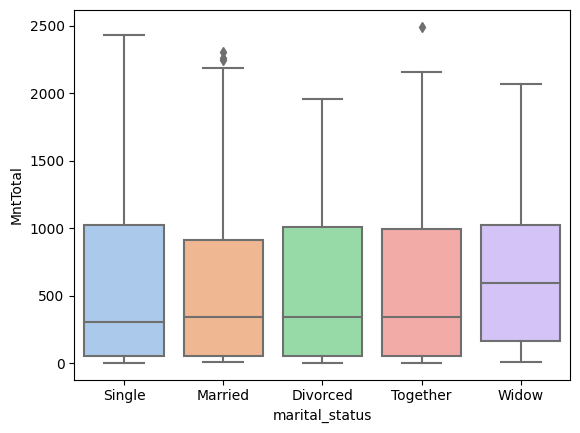

In [154]:
sns.boxplot(x = "marital_status",
            y = "MntTotal",
            data = X_train,
            palette='pastel');

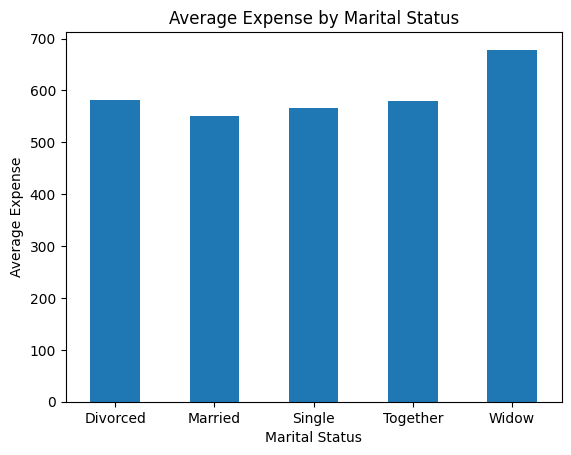

In [155]:
X_train.groupby("marital_status")["MntTotal"].mean().plot(kind="bar").set_title("Average Expense by Marital Status")
plt.ylabel("Average Expense")
plt.xlabel("Marital Status")
plt.xticks(rotation=0);

But for the average expense, widow is the highest of them all.

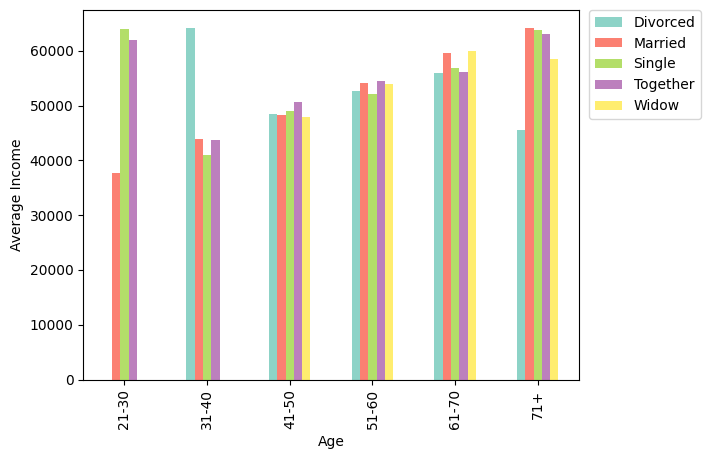

In [156]:
pd.pivot_table(X_train, index='age_bin', columns='marital_status', values='Income', aggfunc='mean').plot(kind='bar', colormap='Set3')
plt.ylabel('Average Income')
plt.xlabel('Age')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

As we can see from the plot above that 21-30 income is contributed by people who (Single, Married, and Together). Then highest of average income at 31-40 are from divorced one. Then there's no significant different in age by marital status.

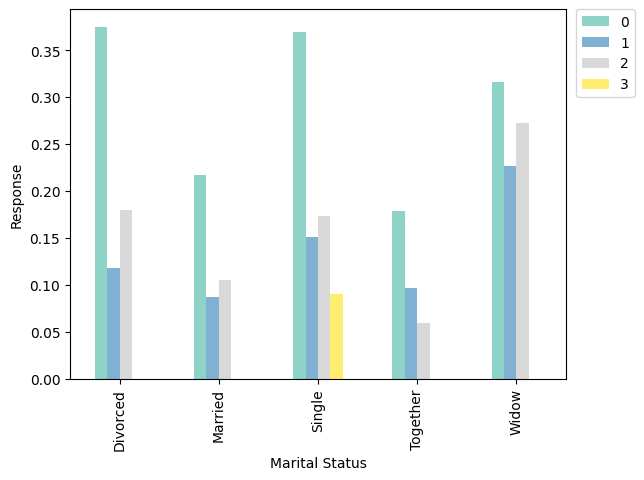

In [157]:
pd.pivot_table(X_train, index='marital_status', columns='dependent_counts', values='Response', aggfunc='mean').plot(kind='bar', colormap='Set3')
plt.ylabel('Response')
plt.xlabel('Marital Status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

It seems there's relationship between dependent count 0 and they who live alone (single, divorced, and widow) which has the highest response to the last campaign. But the married and together but has no dependents also get high response to the last campaign.

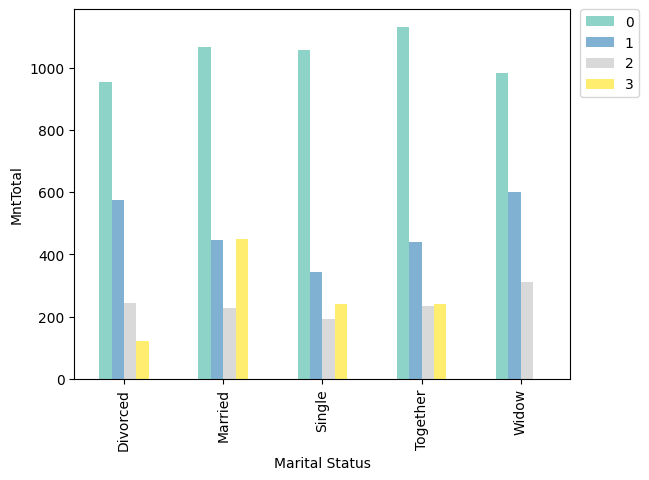

In [158]:
pd.pivot_table(X_train, index='marital_status', columns='dependent_counts', values='MntTotal', aggfunc='mean').plot(kind='bar', colormap='Set3')
plt.ylabel('MntTotal')
plt.xlabel('Marital Status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

Regardless their marital status, I think that they who do not have dependent count tends to spend more and response positively in the last campaign.

##Products

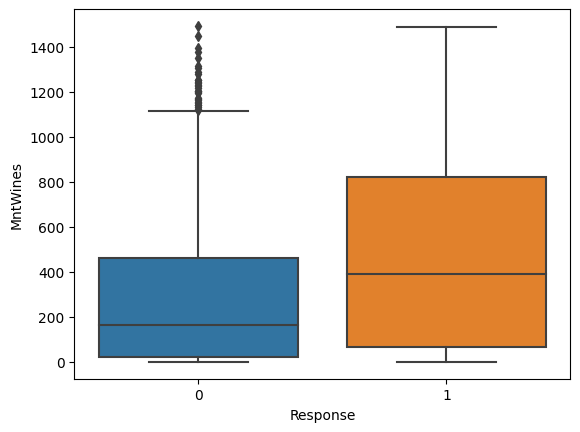

In [159]:
sns.boxplot(x = "Response", y = "MntWines", data = X_train);

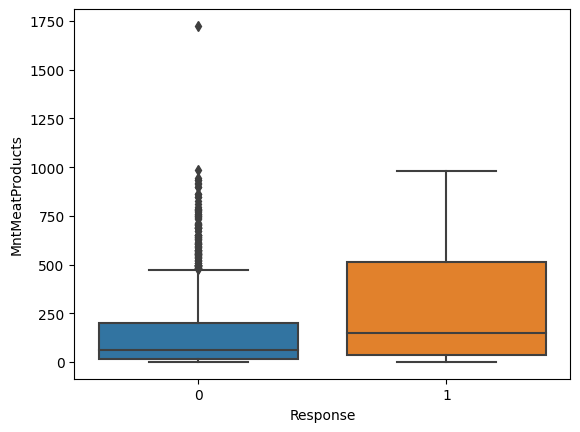

In [160]:
sns.boxplot(x = "Response", y = "MntMeatProducts", data = X_train);

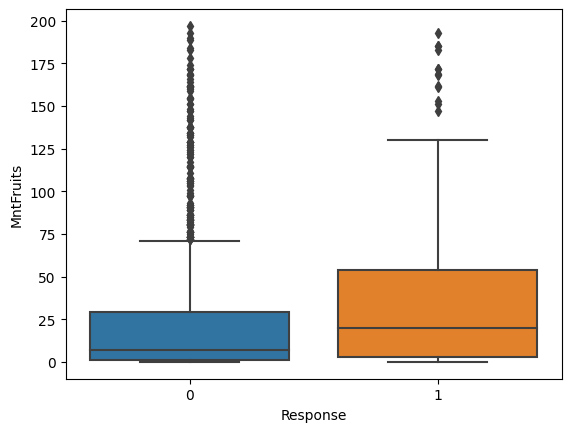

In [161]:
sns.boxplot(x = "Response", y = "MntFruits", data = X_train);

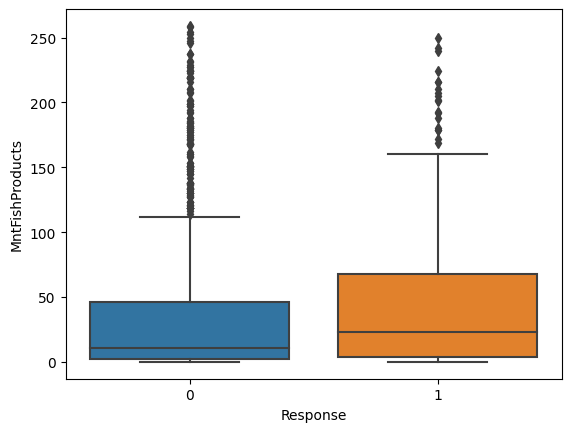

In [162]:
sns.boxplot(x = "Response", y = "MntFishProducts", data = X_train);

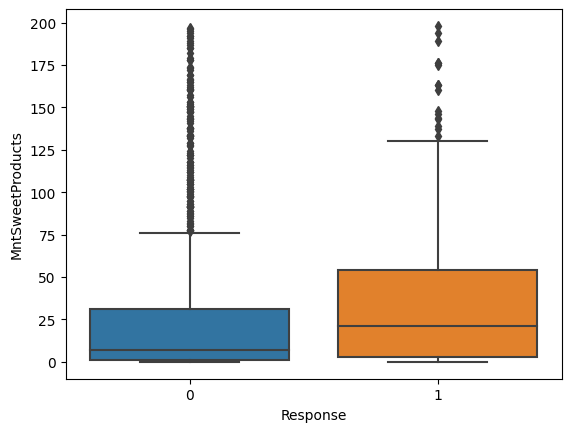

In [163]:
sns.boxplot(x = "Response", y = "MntSweetProducts", data = X_train);

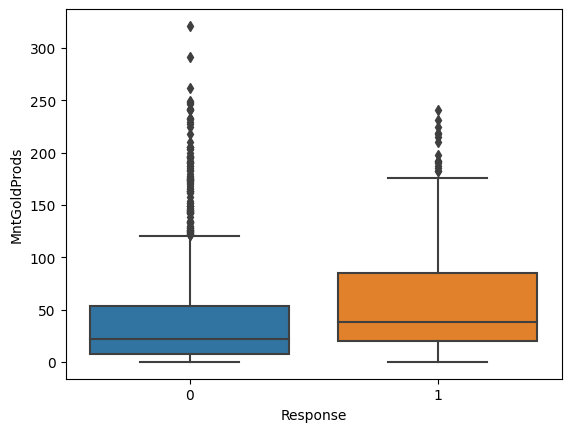

In [164]:
sns.boxplot(x = "Response", y = "MntGoldProds", data = X_train);

As we can see from the boxplots above that, the one who spend more on wines, fruits, meat products, fish products, sweet products, and gold products will likely to response the last campagin than the others.

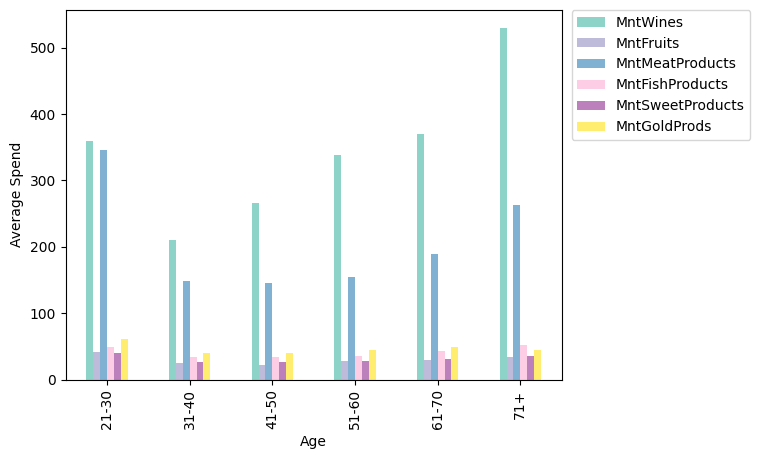

In [165]:
X_train.groupby('age_bin')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().plot(kind='bar', colormap='Set3')
plt.ylabel('Average Spend')
plt.xlabel('Age')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

From the plot above, we can see that average spend for each age range are wines and meat products.

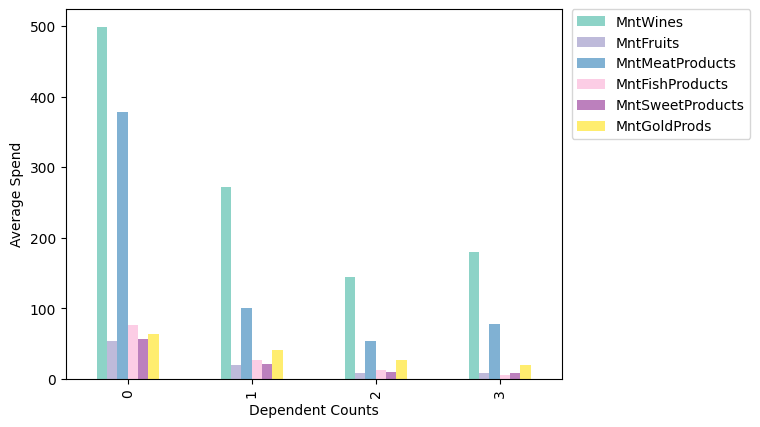

In [166]:
X_train.groupby('dependent_counts')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().plot(kind='bar', colormap='Set3')
plt.ylabel('Average Spend')
plt.xlabel('Dependent Counts')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

The same with the age, the average spend for each dependent counts are wines and meat products.

#Pre-Processing

**Typecasting Categorical Value Into Numeric**

In [167]:
X_train['education_level'].replace(['Basic','2n Cycle','Graduation','Master','PhD'],[0,1,2,3,4], inplace=True)
X_train['marital_status'].replace(['Single','Together','Married','Divorced', 'Widow'],[0,1,2,3,4], inplace=True)

In [168]:
X_test['education_level'].replace(['Basic','2n Cycle','Graduation','Master','PhD'],[0,1,2,3,4], inplace=True)
X_test['marital_status'].replace(['Single','Together','Married','Divorced', 'Widow'],[0,1,2,3,4], inplace=True)

In [169]:
X_train = X_train.drop(["Response"], axis=1)

In [170]:
X_train.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Age', 'Customer_Days',
       'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'marital_status',
       'education_level', 'dependent_counts', 'age_bin'],
      dtype='object')

In [171]:
drop_col1 = ["age_bin","Z_CostContact","Z_Revenue","Complain",'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
drop_col2 = ["Z_CostContact","Z_Revenue","Complain",'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']


X_train = X_train.drop(drop_col1,axis=1)
X_test = X_test.drop(drop_col2, axis=1)

#Modeling

We will use 5 models:

- KNN as a baseline model
- Decision tree
- Random Forest
- SVM RBF
- XGBoost

Compare them all and choose the best model

In [172]:
y_train.value_counts(normalize=True)

0    0.843284
1    0.156716
Name: Response, dtype: float64

**KNN**

In [173]:
knn_clf = KNeighborsClassifier(
    n_neighbors = 5,
)

**Decision Tree**

In [174]:
dc_clf = DecisionTreeClassifier(
    max_depth = 5,
    ccp_alpha = 0.001,
    class_weight = {0: 0.156716, 1:0.843284}
)

**Random Forest**

In [175]:
rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.156716, 1:0.843284}
)

**SVM RBF**

In [176]:
svm_clf = SVC(
    random_state = 1000,
    probability=True,
    class_weight = {0: 0.156716, 1:0.843284}
)

**XGBoost**

In [177]:
xgb_clf = XGBClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.156716, 1:0.843284}
)

##Fitting the Model

**KNN**

In [178]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

**Decision Tree**

In [179]:
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 0.156716, 1: 0.843284},
                       max_depth=5)

**Random Forest**

In [180]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.156716, 1: 0.843284},
                       n_estimators=1000, random_state=1000)

**SVM RBF**

In [181]:
svm_clf.fit(X_train, y_train)

SVC(class_weight={0: 0.156716, 1: 0.843284}, probability=True,
    random_state=1000)

**XGBoost**

In [182]:
xgb_clf.fit(X_train, y_train)

[04:06:55] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 0.156716, 1: 0.843284}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

##Model Evaluation

In [183]:
X_train.shape

(1474, 21)

In [184]:
X_test.shape

(369, 21)

In [185]:
# knn prediction
knn_pred = knn_clf.predict(X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)

# decision tree prediction
dc_pred = dc_clf.predict(X_test)
dc_pred_proba = dc_clf.predict_proba(X_test)

# random forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

**KNN**

In [186]:
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['No Response','Response'], output_dict=True))

,No Response,Response,accuracy,macro avg,weighted avg
precision,0.866279,0.480000,0.840108,0.673140,0.805563
recall,0.958199,0.206897,0.840108,0.582548,0.840108
f1-score,0.909924,0.289157,0.840108,0.599540,0.812351
support,311.000000,58.000000,0.840108,369.000000,369.000000


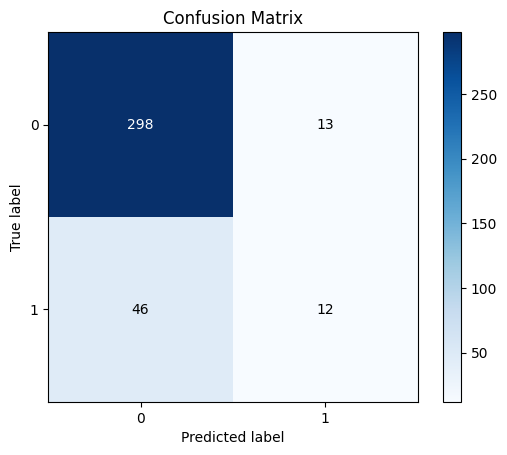

In [187]:
# knn result
skplt.metrics.plot_confusion_matrix(y_test, knn_pred);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



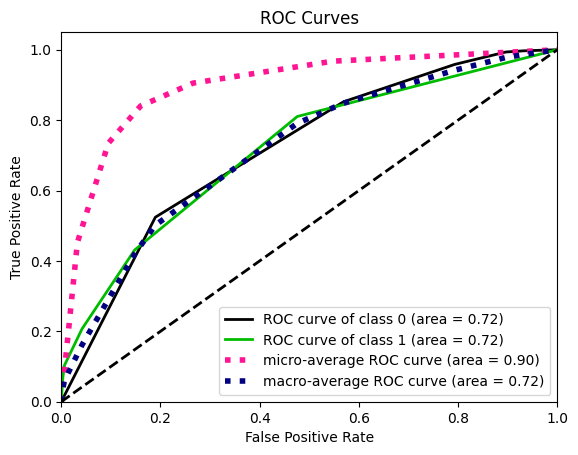

In [188]:
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

**Decision Tree**

In [189]:
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=['No Response','Response'], output_dict=True))

,No Response,Response,accuracy,macro avg,weighted avg
precision,0.930894,0.333333,0.731707,0.632114,0.836969
recall,0.736334,0.706897,0.731707,0.721615,0.731707
f1-score,0.822262,0.453039,0.731707,0.637650,0.764227
support,311.000000,58.000000,0.731707,369.000000,369.000000


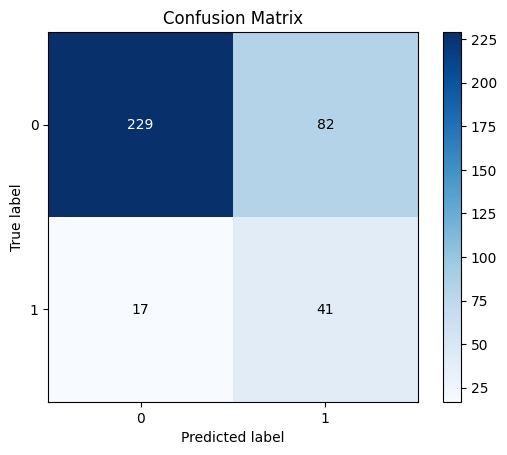

In [190]:
# decision tree result
skplt.metrics.plot_confusion_matrix(y_test, dc_pred);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



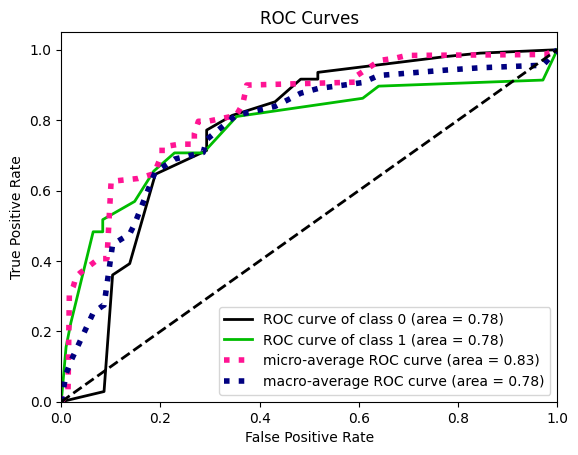

In [191]:
skplt.metrics.plot_roc_curve(y_test, dc_pred_proba);

**Random Forest**

In [192]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['No Response','Response'], output_dict=True))

,No Response,Response,accuracy,macro avg,weighted avg
precision,0.880466,0.653846,0.864499,0.767156,0.844846
recall,0.971061,0.293103,0.864499,0.632082,0.864499
f1-score,0.923547,0.404762,0.864499,0.664155,0.842004
support,311.000000,58.000000,0.864499,369.000000,369.000000


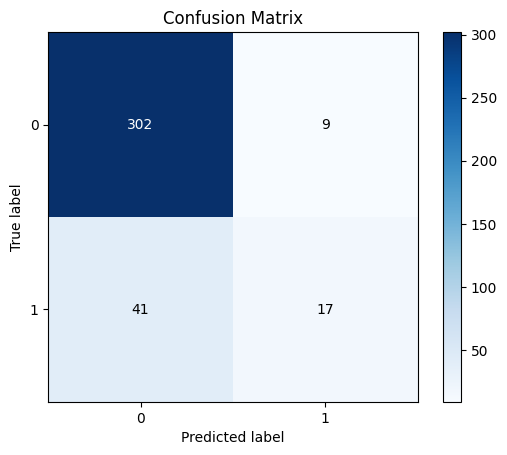

In [193]:
# randomforest result
skplt.metrics.plot_confusion_matrix(y_test, rf_pred);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



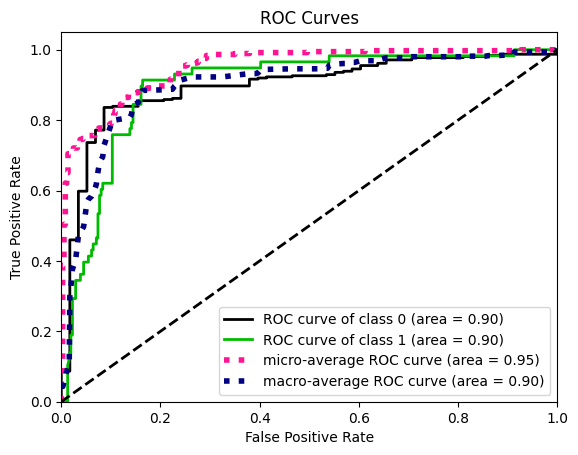

In [194]:
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

**SVM RBF**

In [195]:
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['No Response','Response'], output_dict=True))

,No Response,Response,accuracy,macro avg,weighted avg
precision,0.903571,0.348315,0.769648,0.625943,0.816295
recall,0.813505,0.534483,0.769648,0.673994,0.769648
f1-score,0.856176,0.421769,0.769648,0.638972,0.787895
support,311.000000,58.000000,0.769648,369.000000,369.000000


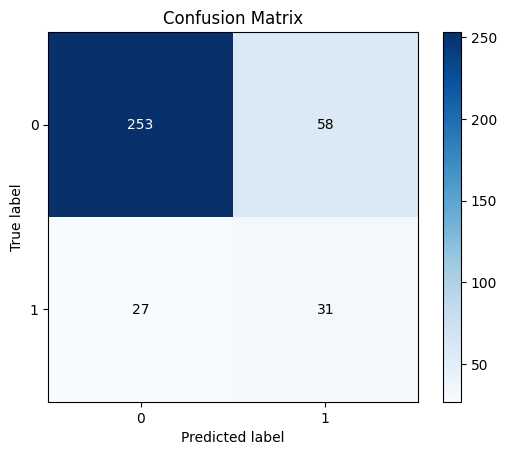

In [196]:
# svm result
skplt.metrics.plot_confusion_matrix(y_test, svm_pred);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



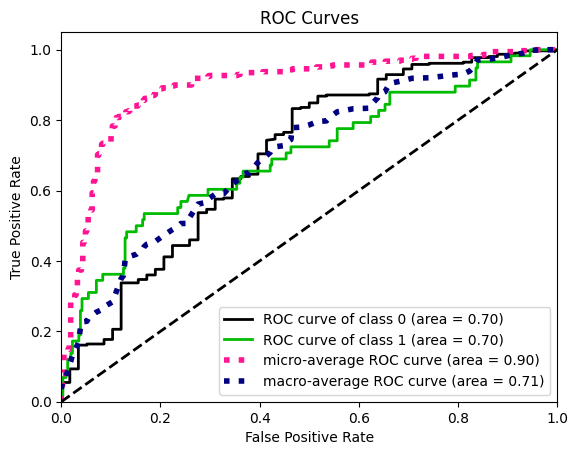

In [197]:
skplt.metrics.plot_roc_curve(y_test, svm_pred_proba);

**XGBoost**

In [198]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['No Response','Response'], output_dict=True))

,No Response,Response,accuracy,macro avg,weighted avg
precision,0.914286,0.574074,0.864499,0.744180,0.860811
recall,0.926045,0.534483,0.864499,0.730264,0.864499
f1-score,0.920128,0.553571,0.864499,0.736850,0.862512
support,311.000000,58.000000,0.864499,369.000000,369.000000


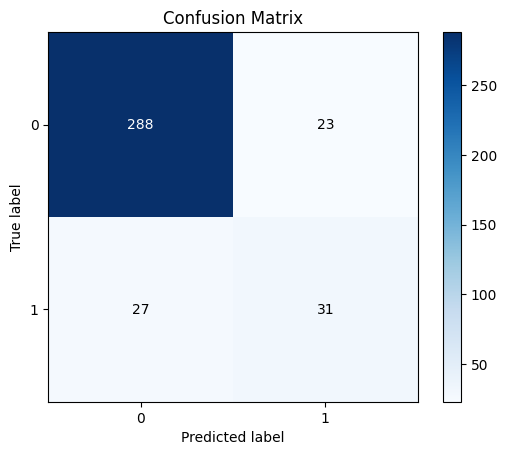

In [199]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



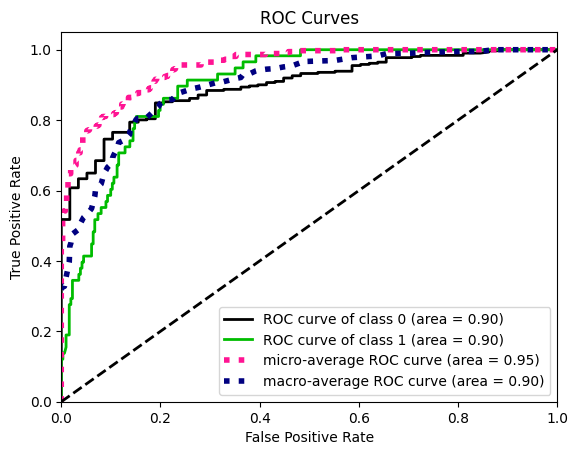

In [200]:
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

#Explanatory Model Analysis

##Feature Importance

In [201]:
## initiate explainer for XGBoost model
response_xgb_exp = dx.Explainer(xgb_clf, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 1474 rows 21 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1474 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7a7f2656a4d0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.83e-09, mean = 0.157, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.504, mean = 3.14e-06, max = 0.506
  -> model_info        : package xgboost

A new explainer has been created!


In [202]:
# visualize permutation feature importance for Random Forest Model
response_xgb_exp.model_parts().plot()

From the permutation feature importance above we can conclude that there are some features that affect to campaign response. The most influence features are overall campaign accepted and recency. I think it makes sense, the recent customer do transaction and the frequent they accept the campaign, the more they will have a good response at the last marketing campaign.

##Partial Dependence Plot

In [203]:
# create partial dependence plot of XGBoost model
response_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 21/21 [00:05<00:00,  3.85it/s]


#Interpretation

1. The more recent customers do transaction, the more likely they accept the marketing campaign. (2.5x from they who has recency more than 80 days)
2. The more customers accepted previous campaign, the more likely they accept the marketing campaign. (For more than 2 accepted campaign it will increase the probability as 44%)
3. If customers spend more than 500 in meat product, it will increase the probability of campaign response to 61%.
4. The longer customers have joined the commerce, the more likely they respond to the marketing campaign (increase 82% if the customers have joined more than 2700 days)
5. The less customers spend in wines, the more likely they respond to the marketing campaign.
6. The less number of purchases made directly in stores, the more likely customers will respond to the last marketing campaign.
7. They who are single, divorced, and widow tend to react or respond to the marketing campaign then they who are married or life together.